# which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

Applied these below mentioned for the analysis: 
- **pandas**
    - **data ingestion and inspection** 
    - **exploratory data analysis**
    - **Manipulating DataFrames with pandas**
        - **tidying and cleaning** 
        - **transforming DataFrames** 
        - **subsetting DataFrames with lists**  
        - **filtering DataFrames**  
        - **grouping data** 
        - **melting data**  
        - **advanced indexing**  
- **matplotlib** 
- **fundamental data types**  
- **dictionaries** 
- **handling dates and times** 
- **function definition** 
- **default arguments, variable length, and scope**  
- **lambda functions and error handling**  

## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 



#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 

import pandas as pd
import numpy as np
# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing


**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [4]:
properties.shape

(341, 49)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [5]:
#transpose the data
properties = properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,820757.0426,865647.8228,865561.3351,884896.7212,952551.4913,930424.7317,952529.7274,842632.2921,894583.7249,885580.7466
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,348396.4143,350109.2815,349552.4486,351242.5951,354485.6669,354799.3903,352258.2006,345869.1263,347863.9263,351021.151
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,590896.309,601505.3863,606057.9735,602165.8061,593702.626,597199.0461,601904.928,604977.6507,594480.5021,581454.7633
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,394752.12,400930.044,404308.03,409127.1711,407337.3436,408227.2906,400929.49,401252.3868,400572.7608,403088.7109


In [7]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
properties = properties.reset_index()

In [9]:
properties.index

RangeIndex(start=0, stop=49, step=1)

In [10]:
properties.head()

,index,0,1,2,3,4,5,6,7,8,...,331,332,333,334,335,336,337,338,339,340
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,820757.0426,865647.8228,865561.3351,884896.7212,952551.4913,930424.7317,952529.7274,842632.2921,894583.7249,885580.7466
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,348396.4143,350109.2815,349552.4486,351242.5951,354485.6669,354799.3903,352258.2006,345869.1263,347863.9263,351021.151
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,590896.309,601505.3863,606057.9735,602165.8061,593702.626,597199.0461,601904.928,604977.6507,594480.5021,581454.7633
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394752.12,400930.044,404308.03,409127.1711,407337.3436,408227.2906,400929.49,401252.3868,400572.7608,403088.7109


In [11]:
properties.columns = properties.iloc[0]

In [12]:
properties.head(3)

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,820757.0426,865647.8228,865561.3351,884896.7212,952551.4913,930424.7317,952529.7274,842632.2921,894583.7249,885580.7466
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,348396.4143,350109.2815,349552.4486,351242.5951,354485.6669,354799.3903,352258.2006,345869.1263,347863.9263,351021.151


In [13]:
#Drop the row at index 0
properties = properties.drop(0) 

In [14]:
properties.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,820757.0426,865647.8228,865561.3351,884896.7212,952551.4913,930424.7317,952529.7274,842632.2921,894583.7249,885580.7466
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,348396.4143,350109.2815,349552.4486,351242.5951,354485.6669,354799.3903,352258.2006,345869.1263,347863.9263,351021.151
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,590896.309,601505.3863,606057.9735,602165.8061,593702.626,597199.0461,601904.928,604977.6507,594480.5021,581454.7633
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394752.12,400930.044,404308.03,409127.1711,407337.3436,408227.2906,400929.49,401252.3868,400572.7608,403088.7109
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,551947.0216,561214.2226,580359.8804,572148.3116,562592.5366,549438.9525,547283.8617,536397.1483,529229.1981,533424.2056


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. 

In [15]:
properties = properties.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [16]:
properties.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,820757.0426,865647.8228,865561.3351,884896.7212,952551.4913,930424.7317,952529.7274,842632.2921,894583.7249,885580.7466
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,348396.4143,350109.2815,349552.4486,351242.5951,354485.6669,354799.3903,352258.2006,345869.1263,347863.9263,351021.151
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,590896.309,601505.3863,606057.9735,602165.8061,593702.626,597199.0461,601904.928,604977.6507,594480.5021,581454.7633
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,394752.12,400930.044,404308.03,409127.1711,407337.3436,408227.2906,400929.49,401252.3868,400572.7608,403088.7109
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,551947.0216,561214.2226,580359.8804,572148.3116,562592.5366,549438.9525,547283.8617,536397.1483,529229.1981,533424.2056


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [17]:
clean_properties = pd.melt(properties, id_vars= ['London_Borough', 'ID'])

In [18]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [19]:
clean_properties = clean_properties.rename(columns={'0':'Month','value':'Average_price'})

In [20]:
clean_properties.head()

,London_Borough,ID,0,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [21]:
clean_properties = clean_properties.rename(columns={0:'Month'})

In [22]:
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [23]:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [24]:
clean_properties.count()

London_Borough    16320
ID                15300
Month             16320
Average_price     15300
dtype: int64

As seen above, there seems to be some null values in ID and Average_price

In [25]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [26]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [27]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [28]:
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
16260,Unnamed: 37,NaN,2023-03-01,NaN
16270,Unnamed: 47,NaN,2023-03-01,NaN
16305,Unnamed: 34,NaN,2023-04-01,NaN
16308,Unnamed: 37,NaN,2023-04-01,NaN


In [29]:
clean_properties['ID'].isna().sum()

1020

In [31]:
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
#NaNFreeDF1.head(50)

In [32]:
NaNFreeDF1.count()

London_Borough    15300
ID                15300
Month             15300
Average_price     15300
dtype: int64

In [33]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(50)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.8881
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [34]:
NaNFreeDF2.count()

London_Borough    15300
ID                15300
Month             15300
Average_price     15300
dtype: int64

In [35]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

Observed some strange values which have a word Unnamed

In [36]:
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(16320, 4)
(15300, 4)
(15300, 4)


In [37]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [38]:
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.9765
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
16314,EAST OF ENGLAND,E12000006,2023-04-01,351468.3066
16315,LONDON,E12000007,2023-04-01,533686.8352
16316,SOUTH EAST,E12000008,2023-04-01,391765.9922
16317,SOUTH WEST,E12000009,2023-04-01,327144.4073


In [39]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16300,Sutton,E09000029,2023-04-01,435888.8308
16301,Tower Hamlets,E09000030,2023-04-01,510542.8024
16302,Waltham Forest,E09000031,2023-04-01,513126.17
16303,Wandsworth,E09000032,2023-04-01,625562.3059


In [40]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [41]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [42]:
#final cleaned dataframe
df=NaNFreeDF2

In [43]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [44]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [45]:
#changing the data type for average_price
df['Average_price'] = pd.to_numeric(df['Average_price'])

In [46]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Text(0, 0.5, 'Price')

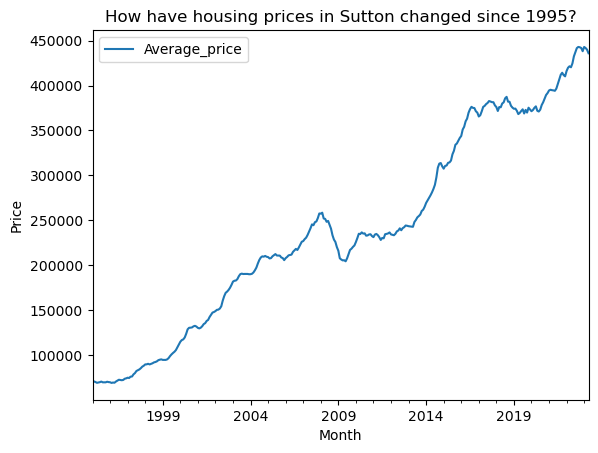

In [47]:
sutton_prices = df[df['London_Borough'] == 'Sutton']
ax = sutton_prices.plot(kind='line',x = 'Month', y='Average_price',title='How have housing prices in Sutton changed since 1995?')
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [48]:
df['Year'] = df['Month'].apply(lambda t: t.year)
df.tail()

,London_Borough,ID,Month,Average_price,Year
16300,Sutton,E09000029,2023-04-01,435888.8308,2023
16301,Tower Hamlets,E09000030,2023-04-01,510542.8024,2023
16302,Waltham Forest,E09000031,2023-04-01,513126.1700,2023
16303,Wandsworth,E09000032,2023-04-01,625562.3059,2023
16304,Westminster,E09000033,2023-04-01,891532.1454,2023


In [49]:
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average_price
London_Borough,Year,
Harrow,2014,360795.807600
Lewisham,1999,84695.143870
Camden,1997,150142.901208
Islington,2006,319644.788458
Southwark,2022,542213.951641
Redbridge,2018,422591.065915
Sutton,2011,233026.678975
Westminster,2000,260492.249892
Hackney,2000,132727.506075


In [50]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

We'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once we written this function, we ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.



In [51]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

In [52]:
create_price_ratio(dfg[dfg['London_Borough']=='Camden'])

[0.20261973503252542]

In [53]:
final = {}

In [54]:
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)

print(final)

{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.229452741207858], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837315], 'Camden': [0.20261973503252542], 'City of London': [0.18862157770244364], 'Croydon': [0.23803288028014052], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011858], 'Greenwich': [0.20995010893854213], 'Hackney': [0.16133493530705728], 'Hammersmith & Fulham': [0.24167443054605847], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.2312015578701476], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300288], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.2341619023428255], 'Lambeth': [0.20170435486140825], 'Lewisham': [0.18351246764721704], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark': [

In [55]:
df_ratios= pd.DataFrame(final)

In [56]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,0.234551,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [57]:
df_ratios = df_ratios.transpose()
df_ratios = df_ratios.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [58]:
df_ratios.rename(columns={'index':'London_Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,London_Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [59]:
top30 = df_ratios.sort_values(by='2018',ascending=False).head(30)
print(top30)

          London_Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655
29         Tower Hamlets  0.216137
23                Merton  0.210914
31            Wandsworth  0.210185
10             Greenwich  0.209950
18             Islington  0.206439
3                  Brent  0.204309
0     Barking & Dagenham  0.204223
5                 Camden  0.202620
21               Lambeth  0.201704
19  Kensington & Chelsea  0.196755
13              Haringey  0.194756
6         City of London  0.188622
24                Ne

[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge'),
 Text(15, 0, 'Tower Hamlets'),
 Text(16, 0, 'Merton'),
 Text(17, 0, 'Wandsworth'),
 Text(18, 0, 'Greenwich'),
 Text(19, 0, 'Islington'),
 Text(20, 0, 'Brent'),
 Text(21, 0, 'Barking & Dagenham'),
 Text(22, 0, 'Camden'),
 Text(23, 0, 'Lambeth'),
 Text(24, 0, 'Kensington & Chelsea'),
 Text(25, 0, 'Haringey'),
 Text(26, 0, 'City of London'),
 Text(27, 0, 'Newham'),
 Text(28, 0, 'Westminster'),
 Text(29, 0, 'Lewisham')]

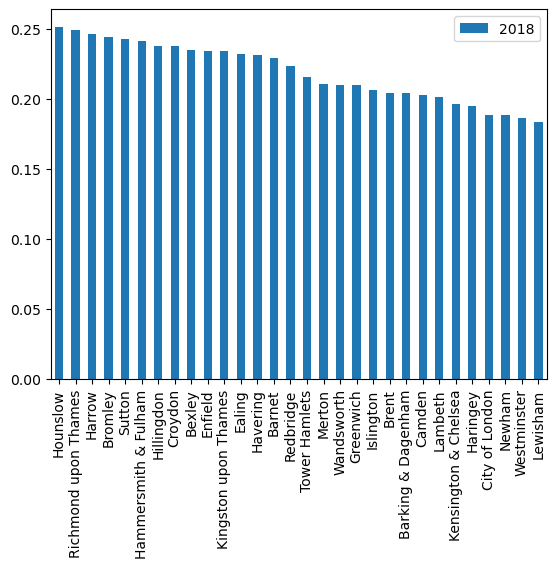

In [60]:
ax = top30[['London_Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top30.London_Borough)

### which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [61]:
#To answer the above question, I think the smaller the ratio value the higher the house price.

df_ratios.sort_values(by='2018')

,London_Borough,2018
11,Hackney,0.161335
30,Waltham Forest,0.171387
27,Southwark,0.181275
22,Lewisham,0.183512
32,Westminster,0.186791
24,Newham,0.188488
6,City of London,0.188622
13,Haringey,0.194756
19,Kensington & Chelsea,0.196755
21,Lambeth,0.201704


[Text(0, 0, 'Barking & Dagenham'),
 Text(1, 0, 'Barnet'),
 Text(2, 0, 'Bexley'),
 Text(3, 0, 'Brent'),
 Text(4, 0, 'Bromley'),
 Text(5, 0, 'Camden'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Ealing'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Greenwich'),
 Text(11, 0, 'Hackney'),
 Text(12, 0, 'Hammersmith & Fulham'),
 Text(13, 0, 'Haringey'),
 Text(14, 0, 'Harrow'),
 Text(15, 0, 'Havering'),
 Text(16, 0, 'Hillingdon'),
 Text(17, 0, 'Hounslow'),
 Text(18, 0, 'Islington'),
 Text(19, 0, 'Kensington & Chelsea'),
 Text(20, 0, 'Kingston upon Thames'),
 Text(21, 0, 'Lambeth'),
 Text(22, 0, 'Lewisham'),
 Text(23, 0, 'Merton'),
 Text(24, 0, 'Newham'),
 Text(25, 0, 'Redbridge'),
 Text(26, 0, 'Richmond upon Thames'),
 Text(27, 0, 'Southwark'),
 Text(28, 0, 'Sutton'),
 Text(29, 0, 'Tower Hamlets'),
 Text(30, 0, 'Waltham Forest'),
 Text(31, 0, 'Wandsworth'),
 Text(32, 0, 'Westminster')]

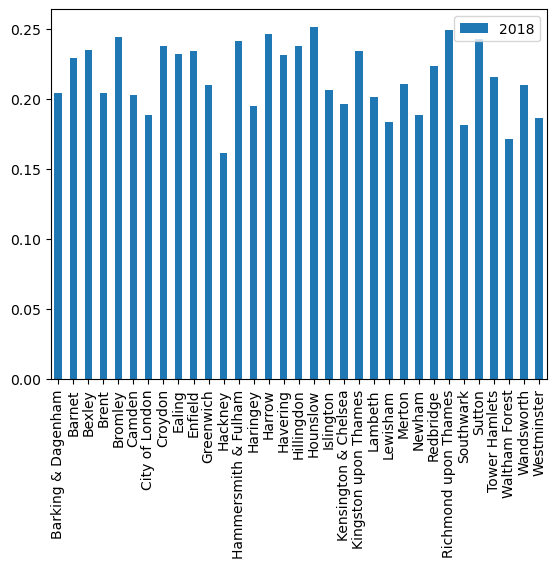

In [62]:
ax = df_ratios[['London_Borough','2018']].plot(kind='bar')

ax.set_xticklabels(df_ratios.London_Borough)

### TOP 15 London boroughs whose average price have seen the greatest increase from 1998 to 2018

In [63]:
top15 = df_ratios.sort_values(by='2018').head(15)
print(top15)

          London_Borough      2018
11               Hackney  0.161335
30        Waltham Forest  0.171387
27             Southwark  0.181275
22              Lewisham  0.183512
32           Westminster  0.186791
24                Newham  0.188488
6         City of London  0.188622
13              Haringey  0.194756
19  Kensington & Chelsea  0.196755
21               Lambeth  0.201704
5                 Camden  0.202620
0     Barking & Dagenham  0.204223
3                  Brent  0.204309
18             Islington  0.206439
10             Greenwich  0.209950


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

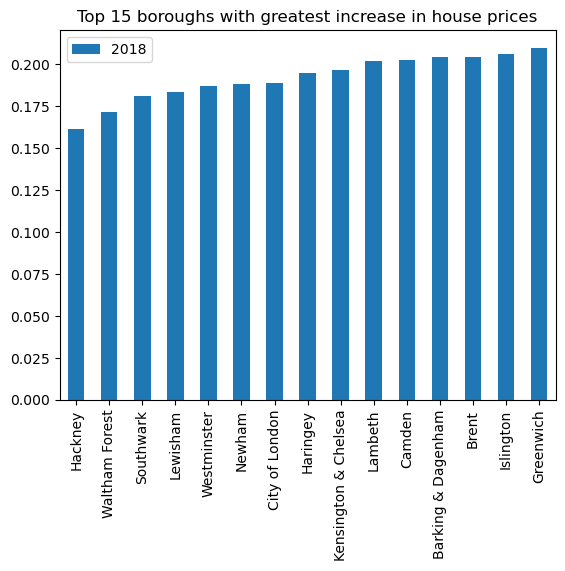

In [64]:
ax = top15[['London_Borough','2018']].plot(kind='bar', title='Top 15 boroughs with greatest increase in house prices')

ax.set_xticklabels(top15.London_Borough)

### 4. Conclusion


#### 'Hackney', 'Waltham Forest', 'Southwark','Lewisham','Westminster', 'Newham', 'City of London', 'Haringey', 'Kensington & Chelsea', 'Lambeth', 'Camden', 'Barking & Dagenham', 'Brent', 'Islington', 'Greenwich' are the Top 15 boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades,